In [1]:
#import pandas, then the data
import pandas as pd
data_path = ('Master_data.xlsx')
data = pd.read_excel(data_path, sheet_name='Division_Cluster')
data.head()

,Division2,Avg_NumOfCrimeByDivision,AREA_SQKM,Avg_CrimeRate_Per_SQKM_ByDiv,Avg_Expenditure,Avg_CrimeRateClearance_Div,Population_2016_Div,Pop_Density_SQKM,Avg_CrimePerCapita100K_Div
0,11,322.888889,18.678458,17.286699,2.529024e+07,0.275404,212644,11384.451524,151.844815
1,12,223.666667,24.780343,9.025971,2.552967e+07,0.362685,185401,7481.776891,120.639407
2,13,292.555556,18.601911,15.727178,2.125158e+07,0.302116,159951,8598.632858,182.903236
3,14,592.111111,14.175254,41.770758,3.372836e+07,0.293869,117640,8298.969370,503.324644
4,22,453.333333,68.121884,6.654739,2.600482e+07,0.280615,213428,3133.031383,212.405745


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Division2                     16 non-null     int64  
 1   Avg_NumOfCrimeByDivision      16 non-null     float64
 2   AREA_SQKM                     16 non-null     float64
 3   Avg_CrimeRate_Per_SQKM_ByDiv  16 non-null     float64
 4   Avg_Expenditure               16 non-null     float64
 5   Avg_CrimeRateClearance_Div    16 non-null     float64
 6   Population_2016_Div           16 non-null     int64  
 7   Pop_Density_SQKM              16 non-null     float64
 8   Avg_CrimePerCapita100K_Div    16 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 1.2 KB


In [4]:
data['Division2'].value_counts()

11    1
12    1
13    1
14    1
22    1
23    1
31    1
32    1
33    1
41    1
42    1
43    1
51    1
52    1
53    1
54    1
Name: Division2, dtype: int64

In [41]:
data_Kmeans =data[['Division2','Avg_Expenditure','Avg_CrimePerCapita100K_Div','Avg_CrimeRate_Per_SQKM_ByDiv','Pop_Density_SQKM','Avg_CrimeRateClearance_Div']]

In [6]:
data_Kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Division2                     16 non-null     int64  
 1   Avg_Expenditure               16 non-null     float64
 2   Avg_CrimePerCapita100K_Div    16 non-null     float64
 3   Avg_CrimeRate_Per_SQKM_ByDiv  16 non-null     float64
 4   Pop_Density_SQKM              16 non-null     float64
 5   Avg_CrimeRateClearance_Div    16 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 896.0 bytes


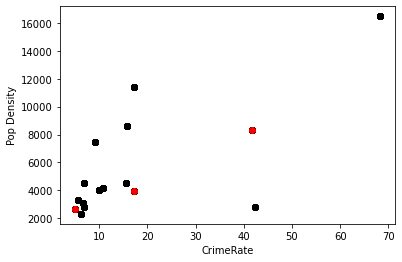

In [9]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (data_Kmeans.sample(n=K))
plt.scatter(data_Kmeans["Avg_CrimeRate_Per_SQKM_ByDiv"],data_Kmeans["Pop_Density_SQKM"],c='black')
plt.scatter(Centroids["Avg_CrimeRate_Per_SQKM_ByDiv"],Centroids["Pop_Density_SQKM"],c='red')
plt.xlabel('CrimeRate')
plt.ylabel('Pop Density')
plt.show()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters=3)

In [43]:
## predict the labels of clusters.
#data_Kmeans['cluster']= kmeans.fit_predict(data_Kmeans[['Avg_Expenditure','Avg_CrimePerCapita100K_Div','Avg_CrimeRateClearance_Div']])

#data_Kmeans['cluster']= kmeans.fit_predict(data_Kmeans[['Division2','Avg_Expenditure','Avg_CrimePerCapita100K_Div','Pop_Density_SQKM','Avg_CrimeRateClearance_Div']])

#data_Kmeans['cluster']= kmeans.fit_predict(data_Kmeans[['Avg_Expenditure','Avg_CrimeRate_Per_SQKM_ByDiv','Avg_CrimeRateClearance_Div']])
data_Kmeans['cluster']= kmeans.fit_predict(data_Kmeans[['Avg_Expenditure','Avg_CrimeRate_Per_SQKM_ByDiv','Avg_CrimePerCapita100K_Div','Avg_CrimeRateClearance_Div']])

C:\Users\zhaosha\AppData\Local\Temp\ipykernel_12900\1610744811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Kmeans['cluster']= kmeans.fit_predict(data_Kmeans[['Avg_Expenditure','Avg_CrimeRate_Per_SQKM_ByDiv','Avg_CrimePerCapita100K_Div','Avg_CrimeRateClearance_Div']])


In [44]:
print(data_Kmeans['cluster'])

0     0
1     0
2     0
3     1
4     0
5     1
6     1
7     1
8     0
9     1
10    0
11    1
12    1
13    1
14    0
15    2
Name: cluster, dtype: int32


In [45]:
data_Kmeans['cluster'].value_counts()

1    8
0    7
2    1
Name: cluster, dtype: int64

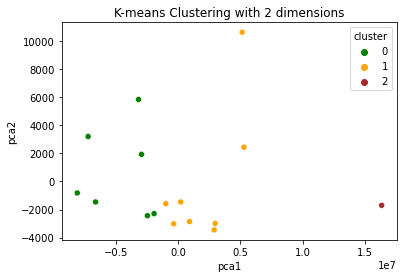

In [46]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
from sklearn.decomposition import PCA

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_Kmeans)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2",  hue=data_Kmeans['cluster'], data=results,palette=['green','orange','brown'], legend='full')
#sns.scatterplot(x="pca1", y="pca2",  hue=data_Kmeans['cluster'], data=results,palette=['green','orange','brown','dodgerblue'], legend='full')

plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [47]:
kmeans.cluster_centers_

array([[2.38344908e+07, 1.11894971e+01, 2.03129741e+02, 2.44288310e-01],
       [3.04640804e+07, 2.38970614e+01, 4.54386691e+02, 2.55882620e-01],
       [4.47667602e+07, 1.54776849e+01, 3.39352144e+02, 2.88288288e-01]])

In [48]:
kmeans.labels_

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2])

In [49]:
#data_Kmeans.groupby(['cluster'])['Avg_Expenditure','Avg_CrimePerCapita100K_Div','Avg_CrimeRateClearance_Div'].mean()

data_Kmeans.groupby(['cluster'])['Avg_Expenditure','Avg_CrimeRate_Per_SQKM_ByDiv','Avg_CrimePerCapita100K_Div','Avg_CrimeRateClearance_Div'].mean()

C:\Users\zhaosha\AppData\Local\Temp\ipykernel_12900\3917698616.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_Kmeans.groupby(['cluster'])['Avg_Expenditure','Avg_CrimeRate_Per_SQKM_ByDiv','Avg_CrimePerCapita100K_Div','Avg_CrimeRateClearance_Div'].mean()


,Avg_Expenditure,Avg_CrimeRate_Per_SQKM_ByDiv,Avg_CrimePerCapita100K_Div,Avg_CrimeRateClearance_Div
cluster,,,,
0,2.383449e+07,11.189497,203.129741,0.244288
1,3.046408e+07,23.897061,454.386691,0.255883
2,4.476676e+07,15.477685,339.352144,0.288288


In [50]:
data_Kmeans.groupby(['cluster'])['Division2'].unique()

cluster
0        [11, 12, 13, 22, 33, 42, 53]
1    [14, 23, 31, 32, 41, 43, 51, 52]
2                                [54]
Name: Division2, dtype: object